In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt

In [11]:
filename = 'credit_card.csv'
df = pd.read_csv(filename)

df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,TRGT1
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [12]:
#Data cleaning: Removing sparse entries from the dataset
indexes = []
names = list(df.columns)[11:-1]
#print(names)
dfnew = df[names]
indexes=[]
for i in range(30000):
    row = list(dfnew.iloc[i])
    if(row.count(0)>=7):
        indexes.append(i)
#Dropping the indexes from the dataframe
dnew = df
dnew = dnew.drop(dnew.index[indexes])



In [13]:
print(dnew.head())

   LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
1     120000    2          2         2   26     -1      2      0      0   
2      90000    2          2         2   34      0      0      0      0   
3      50000    2          2         1   37      0      0      0      0   
4      50000    1          2         1   57     -1      0     -1      0   
5      50000    1          1         2   37      0      0      0      0   

   PAY_5  ...    BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  \
1      0  ...         3272       3455       3261         0      1000   
2      0  ...        14331      14948      15549      1518      1500   
3      0  ...        28314      28959      29547      2000      2019   
4      0  ...        20940      19146      19131      2000     36681   
5      0  ...        19394      19619      20024      2500      1815   

   PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  TRGT1  
1      1000      1000         0      2000      1  
2      1000   

In [14]:
def KFind(x_train, x_test, y_train, y_test):
    accuracy_train=[]
    accuracy_test=[]
    for i in range(1,11):
        clf = KNeighborsClassifier(n_neighbors=i)
        clf.fit(x_train, y_train)
        accuracy_train.append(clf.score(x_train, y_train))
        accuracy_test.append(clf.score(x_test, y_test))
    #K will be the maximum accuracy for test data
    neighbours = [i for i in range(1,11)]
    plt.plot(neighbours, accuracy_train, label="Training set accuracy")
    plt.plot(neighbours, accuracy_test, label="Testing set accuracy")    
    plt.legend()
    plt.show()
    maximum = max(accuracy_test)
    index = accuracy_test.index(maximum)
    no_of_neighbours = index+1
    print("The most optimal k for KNN classifier is ", no_of_neighbours)
    return(no_of_neighbours)

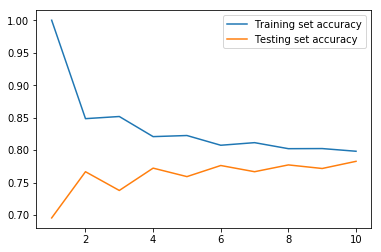

The most optimal k for KNN classifier is  10


In [15]:
array = dnew.values
X = array[:,:-1]
Y = array[:,-1]
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state = 0, test_size = 0.2)
k = KFind(x_train, x_test, y_train, y_test)

In [16]:
clf = KNeighborsClassifier(n_neighbors=k)
clf.fit(x_train, y_train)
y_pred_train = clf.predict(x_train)
y_pred_test = clf.predict(x_test)
print("Details of the training set")
print(confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train ))
print("Details of the testing set")
print(confusion_matrix(y_test, y_pred_test))
print(classification_report(y_test, y_pred_test ))

Details of the training set
[[16701   328]
 [ 4062   671]]
              precision    recall  f1-score   support

           0       0.80      0.98      0.88     17029
           1       0.67      0.14      0.23      4733

   micro avg       0.80      0.80      0.80     21762
   macro avg       0.74      0.56      0.56     21762
weighted avg       0.78      0.80      0.74     21762

Details of the testing set
[[4142  120]
 [1062  117]]
              precision    recall  f1-score   support

           0       0.80      0.97      0.88      4262
           1       0.49      0.10      0.17      1179

   micro avg       0.78      0.78      0.78      5441
   macro avg       0.64      0.54      0.52      5441
weighted avg       0.73      0.78      0.72      5441



In [17]:
print("Accuracy of the training set")
print(clf.score(x_train, y_train)*100,'%')
print("Accuracy of the test set")
print(clf.score(x_test, y_test)*100,'%')

Accuracy of the training set
79.82722176270563 %
Accuracy of the test set
78.27605219628745 %
